In [2]:
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['googleplaystore.csv']))


In [4]:
%matplotlib inline

In [5]:
sns.set(style='darkgrid')
sns.set_palette('PuBuGn_d')

In [6]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

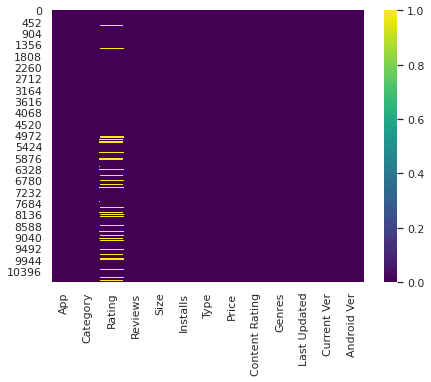

In [8]:
# missing data and NaN values check
plt.figure(figsize=(7, 5))
sns.heatmap(df.isnull(), cmap='viridis')
df.isnull().any()

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
#filling missing values with median.
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# cleaning all non numerical values & unicode charachters in  
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].median())


In [11]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [12]:

i = df[df['Category'] == '1.9'].index
df.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0,NaN


In [13]:
df = df.drop(i)

In [14]:
df = df[pd.notnull(df['Last Updated'])]
df = df[pd.notnull(df['Content Rating'])]

In [15]:
le = preprocessing.LabelEncoder()
df['App'] = le.fit_transform(df['App'])


In [16]:
df['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10840, dtype: object

In [17]:
le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])

In [18]:
le = preprocessing.LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])


In [19]:
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))


In [20]:
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [21]:
df['Type'] = pd.get_dummies(df['Type'])


In [22]:
import time
import datetime
df['Last Updated'] = df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))


In [23]:
k_indices = df['Size'].loc[df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df.loc[k_indices,'Size'] = converter

In [28]:
features = ['App', 'Reviews', 'Size', 'Installs', 'Type','Price' ,'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
X = df[features]
y = df['Rating']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
from sklearn.ensemble import RandomForestRegressor 
 
model = RandomForestRegressor(n_estimators = 150, random_state = 0) 
  

model.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
accuracy = model.score(X_test,y_test)
'Test Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Test Accuracy: 93.65%'

In [ ]:
for i in range(len(y)):
  if y.iloc[i]>0.0 and y.iloc[i]<=0.5:
    y.iloc[i]=0
  if y.iloc[i]>0.5 and y.iloc[i]<=1.0:
    y.iloc[i]=1
  if y.iloc[i]>1.0 and y.iloc[i]<=1.5:
    y.iloc[i]=2
  if y.iloc[i]>1.5 and y.iloc[i]<=2.0:
    y.iloc[i]=3
  if y.iloc[i]>2.0 and y.iloc[i]<=2.5:
    y.iloc[i]=4
  if y.iloc[i]>2.5 and y.iloc[i]<=3.0:
    y.iloc[i]=5
  if y.iloc[i]>3.0 and y.iloc[i]<=3.5:
    y.iloc[i]=6
  if y.iloc[i]>3.5 and y.iloc[i]<=4.0:
    y.iloc[i]=7
  if y.iloc[i]>4.0 and y.iloc[i]<=4.5:
    y.iloc[i]=8
  if y.iloc[i]>4.5 and y.iloc[i]<=5.0:
    y.iloc[i]=9
print(y.iloc[0])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


8.0


In [ ]:
count0=0
count1=0
count2=0
count3=0
count4=0
count5=0
count6=0
count7=0
count8=0
count9=0

In [ ]:
for i in range(len(y)):
  if y.iloc[i]==0:
    count0+=1
  if y.iloc[i]==1:
    count1+=1
  if y.iloc[i]==2:
    count2+=1
  if y.iloc[i]==3:
    count3+=1
  if y.iloc[i]==4:
    count4+=1
  if y.iloc[i]==5:
    count5+=1
  if y.iloc[i]==6:
    count6+=1
  if y.iloc[i]==7:
    count7+=1
  if y.iloc[i]==8:
    count8+=1
  if y.iloc[i]==9:
    count9+=1

In [ ]:
print("level 0 =", count0)
print("level 1 =", count1)
print("level 2 =", count2)
print("level 3 =", count3)
print("level 4 =", count4)
print("level 5 =", count5)
print("level 6 =", count6)
print("level 7 =", count7)
print("level 8 =", count8)
print("level 9 =", count9)

level 0 = 1695
level 1 = 16
level 2 = 0
level 3 = 0
level 4 = 0
level 5 = 0
level 6 = 488
level 7 = 1522
level 8 = 5225
level 9 = 1894


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)


In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [37]:
X, y = make_classification(n_samples=100, random_state=1)

In [38]:
model=MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [ ]:
# Calculate the mean accuracy of the MLP model
accuracy = model.score(X_test,y_test)
'Test Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Test Accuracy: 40.18%'

In [ ]:
model2=MLPClassifier(random_state=1, max_iter=3000).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# Calculate the mean accuracy of the MLP model
accuracy2 = model2.score(X_test,y_test)
'Test Accuracy: ' + str(np.round(accuracy2*100, 2)) + '%'

'Test Accuracy: 65.22%'

In [ ]:
model3=MLPClassifier(random_state=1, max_iter=10000).fit(X_train, y_train)

In [ ]:
# Calculate the mean accuracy of the MLP model
accuracy3 = model3.score(X_test,y_test)
'Test Accuracy: ' + str(np.round(accuracy3*100, 2)) + '%'

'Test Accuracy: 65.22%'

In [ ]:
model4=MLPClassifier(random_state=1, max_iter=3000,hidden_layer_sizes=300).fit(X_train, y_train)

In [ ]:
accuracy4 = model4.score(X_test,y_test)
'Test Accuracy: ' + str(np.round(accuracy4*100, 2)) + '%'

'Test Accuracy: 65.31%'